# 01C Data Visualizations

## Imports

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline

## Read Data

In [30]:
df = pd.read_csv('../west_nile/west_nile/input/train.csv')
spray_df = pd.read_csv('../west_nile/west_nile/input/spray.csv')

## Proportion of Data by Mosquitos Species

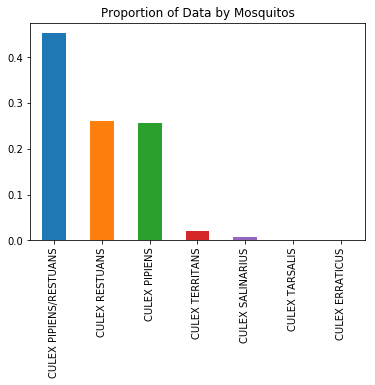

In [31]:
plt.title('Proportion of Data by Mosquitos')
df.Species.value_counts(normalize=True).plot(kind='bar');

## Incidence of West Nile Virus by Mosquito Species

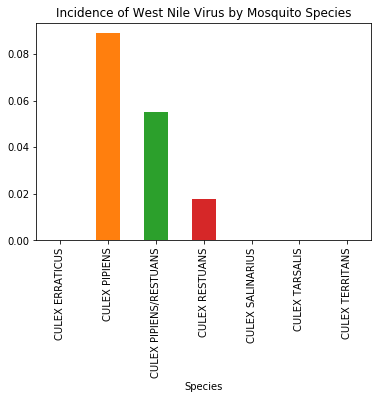

In [32]:
plt.title('Incidence of West Nile Virus by Mosquito Species')
df.groupby('Species')['WnvPresent'].mean().plot(kind='bar');

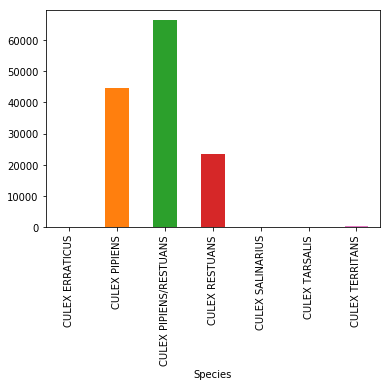

In [33]:
df.groupby('Species')['NumMosquitos'].sum().plot(kind='bar');

In [34]:
df.groupby('Species')['NumMosquitos'].sum()

Species
CULEX ERRATICUS               7
CULEX PIPIENS             44671
CULEX PIPIENS/RESTUANS    66268
CULEX RESTUANS            23431
CULEX SALINARIUS            145
CULEX TARSALIS                7
CULEX TERRITANS             510
Name: NumMosquitos, dtype: int64

In [35]:
cols = [col for col in df.columns if col not in ['NumMosquitos', 'WnvPresent']]
df = df.groupby(cols, as_index=False).sum()
df['WnvPresent'] = (df.WnvPresent>0).astype(int)

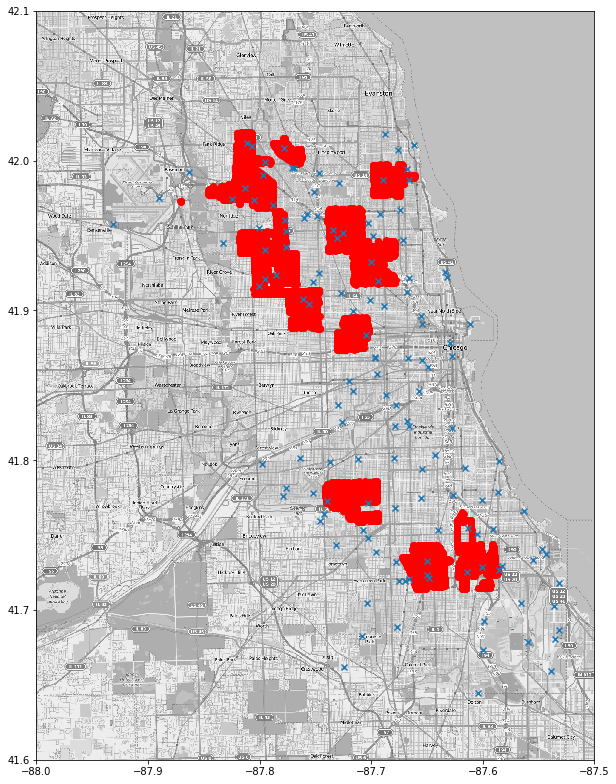

In [36]:

mapdata = np.loadtxt("../west_nile/west_nile/input/mapdata_copyright_openstreetmap_contributors.txt")
traps = df[['Date', 'Trap','Longitude', 'Latitude', 'WnvPresent']]

aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

plt.figure(figsize=(10,14))
plt.imshow(mapdata,
          cmap=plt.get_cmap('gray'),
          extent=lon_lat_box,
          aspect=aspect)

spray_df = spray_df[spray_df['Longitude']>-88]
locations = traps[['Longitude', 'Latitude']].drop_duplicates().values
sprays = spray_df[['Longitude', 'Latitude']].drop_duplicates().values
plt.scatter(sprays[:,0], sprays[:,1], c='r', alpha=1)
plt.scatter(locations[:,0], locations[:,1], marker='x')


Text(0.5,1,'Probability of WNV by num of mosquitos')

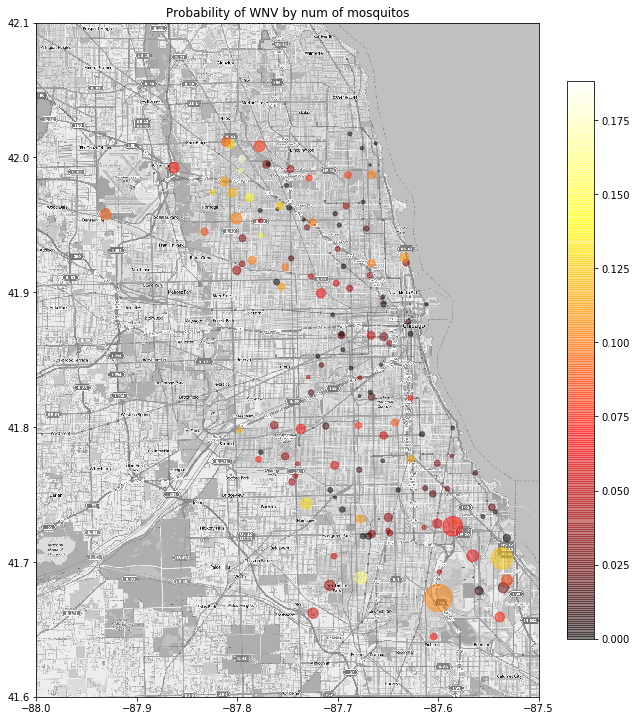

In [37]:
dfll = df.groupby(['Latitude', 'Longitude'],as_index=False).mean().copy()
traps = df[['Date', 'Trap','Longitude', 'Latitude', 'WnvPresent']]

aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

plt.figure(figsize=(10,14))
plt.imshow(mapdata,
          cmap=plt.get_cmap('gray'),
          extent=lon_lat_box,
          aspect=aspect)

locations = traps[['Longitude', 'Latitude']].drop_duplicates().values
#plt.scatter(locations[:,0], locations[:,1], marker='x')
plt.scatter(dfll['Longitude'], dfll['Latitude'], c=dfll.WnvPresent, s=5*dfll.NumMosquitos, 
            marker='o',alpha=0.5, cmap='hot')
plt.colorbar(fraction=0.05)
plt.title('Probability of WNV by num of mosquitos')

## Correlation between number of mosquitos and probability of WNV

In [38]:
df.NumMosquitos.value_counts().index.sort_values(ascending=False)

Int64Index([2532, 2356, 2207, 1658, 1648, 1554, 1543, 1520, 1310, 1054,
            ...
              10,    9,    8,    7,    6,    5,    4,    3,    2,    1],
           dtype='int64', length=232)

In [39]:
df.corr()['NumMosquitos']

Block             -0.075044
Latitude          -0.058984
Longitude         -0.001723
AddressAccuracy   -0.092286
NumMosquitos       1.000000
WnvPresent         0.233532
Name: NumMosquitos, dtype: float64

In [40]:
df['Month'] = df.Date.str[5:7]
df = pd.get_dummies(df, columns=['Month', 'Species'])

In [41]:
with open('../Cleansed_Data/weather_df_comp.pkl', 'rb') as f:
    weather_df_comp = pickle.load(f)

In [42]:
df = df.join(weather_df_comp, on='Date')

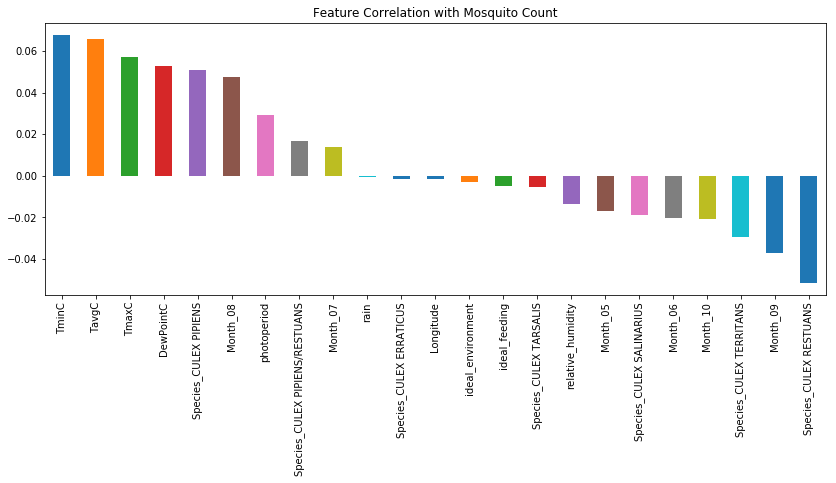

In [43]:
fig = plt.figure(figsize=(14,5))
df.drop(['WnvPresent', 'AddressAccuracy','Block', 'Latitude'], 
        axis=1).corr()['NumMosquitos'].sort_values(ascending=False)[1:].plot(kind='bar')
plt.title("Feature Correlation with Mosquito Count")
plt.xticks(size = 10);

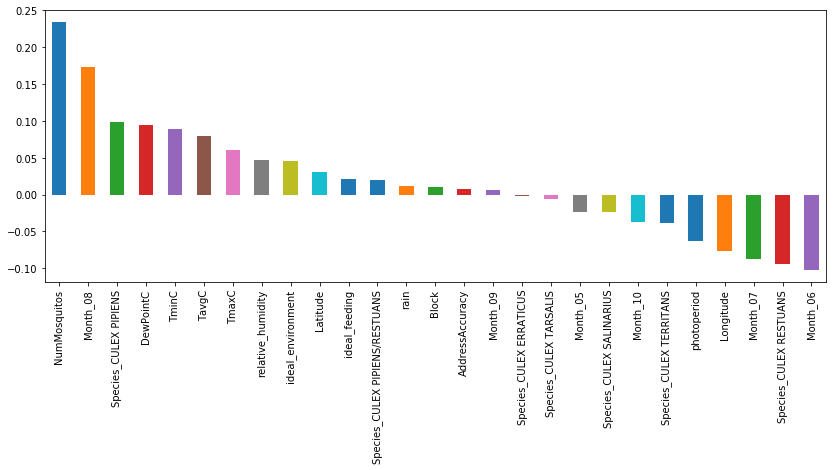

In [44]:
fig = plt.figure(figsize=(14,5))
df.corr()['WnvPresent'].sort_values(ascending=False)[1:].plot(kind='bar')
plt.xticks(size = 10);
#plt.title("Feature Correlation with West Nile Virus")

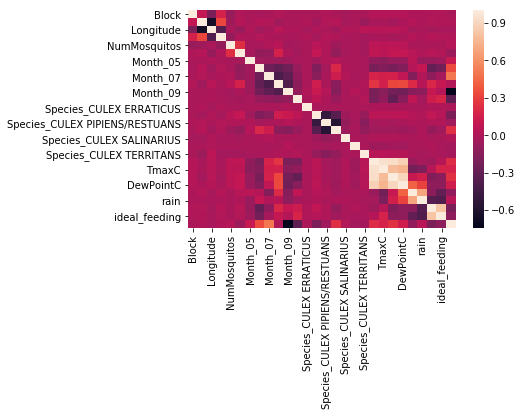

In [45]:
sns.heatmap(df.corr())

#### Get trap_df again after adding average temperature

In [46]:
trap_df = df[df.Trap == 'T900']
wnvDates = trap_df[trap_df.WnvPresent ==1]['Date']

In [47]:
pop_df = df.groupby('Date')[['NumMosquitos']].sum()
pop_df['Date'] = pop_df.index

In [48]:
temp_df = df.groupby('Date')[['TavgC']].mean()
temp_df['Date'] = temp_df.index

In [49]:
trap_df.Date.count()

154

([], <a list of 0 Text xticklabel objects>)

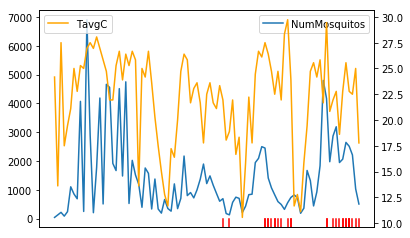

In [50]:
fig, ax1 = plt.subplots()
ax1.plot(pop_df.Date, pop_df.NumMosquitos)
plt.xticks(rotation='vertical', fontsize=7)
plt.legend(loc=1)
for d in wnvDates:
    plt.axvline(d, ymax=0.04, c='r')

ax2 = ax1.twinx()
ax2.plot(temp_df.Date, temp_df.TavgC, c='orange')
plt.legend()
plt.xticks([])

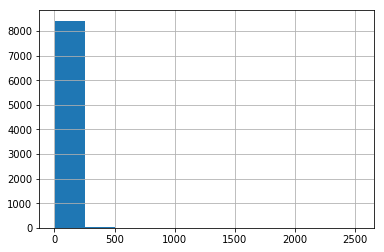

In [51]:
df.NumMosquitos.hist()

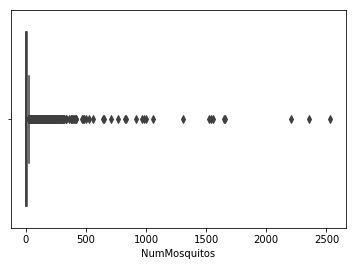

In [52]:
sns.boxplot(df.NumMosquitos)